# Part 1 : Data Preprocessing

Dataset link: https://www.kaggle.com/aniruddhachoudhury/esigning-of-loan-based-on-financial-history

## Importing the libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("financial_data.csv")

## Data Exploration

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
dataset.shape

(17908, 21)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [6]:
dataset.select_dtypes(include="object").columns

Index(['pay_schedule'], dtype='object')

In [7]:
len(dataset.select_dtypes(include="object").columns)


1

In [8]:
dataset.select_dtypes(include=["int64","float64"]).columns


Index(['entry_id', 'age', 'home_owner', 'income', 'months_employed',
       'years_employed', 'current_address_year', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed'],
      dtype='object')

In [9]:
len(dataset.select_dtypes(include=["int64","float64"]).columns)


20

In [10]:
dataset.describe()


,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


## Dealing with Missing Data

In [11]:
dataset.isnull().sum()


entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [12]:
dataset.isnull().values.any()


False

In [13]:
dataset.isnull().values.sum()


0

## Encoding Categorical Data

In [14]:
dataset.select_dtypes(include="object").columns

Index(['pay_schedule'], dtype='object')

In [15]:
dataset["pay_schedule"].unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [16]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [17]:
## One Hot Encoding
dataset = pd.get_dummies(data=dataset,drop_first=True,dtype="int")

In [18]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


## Countplot

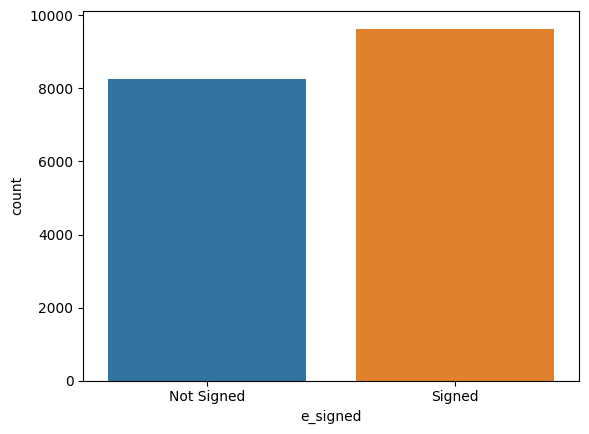

In [19]:
# Create a countplot
sns.countplot(data=dataset, x='e_signed', label='Count')

# Set labels for the x-axis
plt.xticks([0, 1], ["Not Signed",'Signed'])

# Show the plot
plt.show()

In [20]:
# e-signed values
(dataset.e_signed == 1).sum()

9639

In [21]:
# not e-signed values
(dataset.e_signed == 0).sum()

8269

## Correlattion  Matrix and Heat Map

In [22]:
dataset_2 = dataset.drop(columns=["e_signed"])

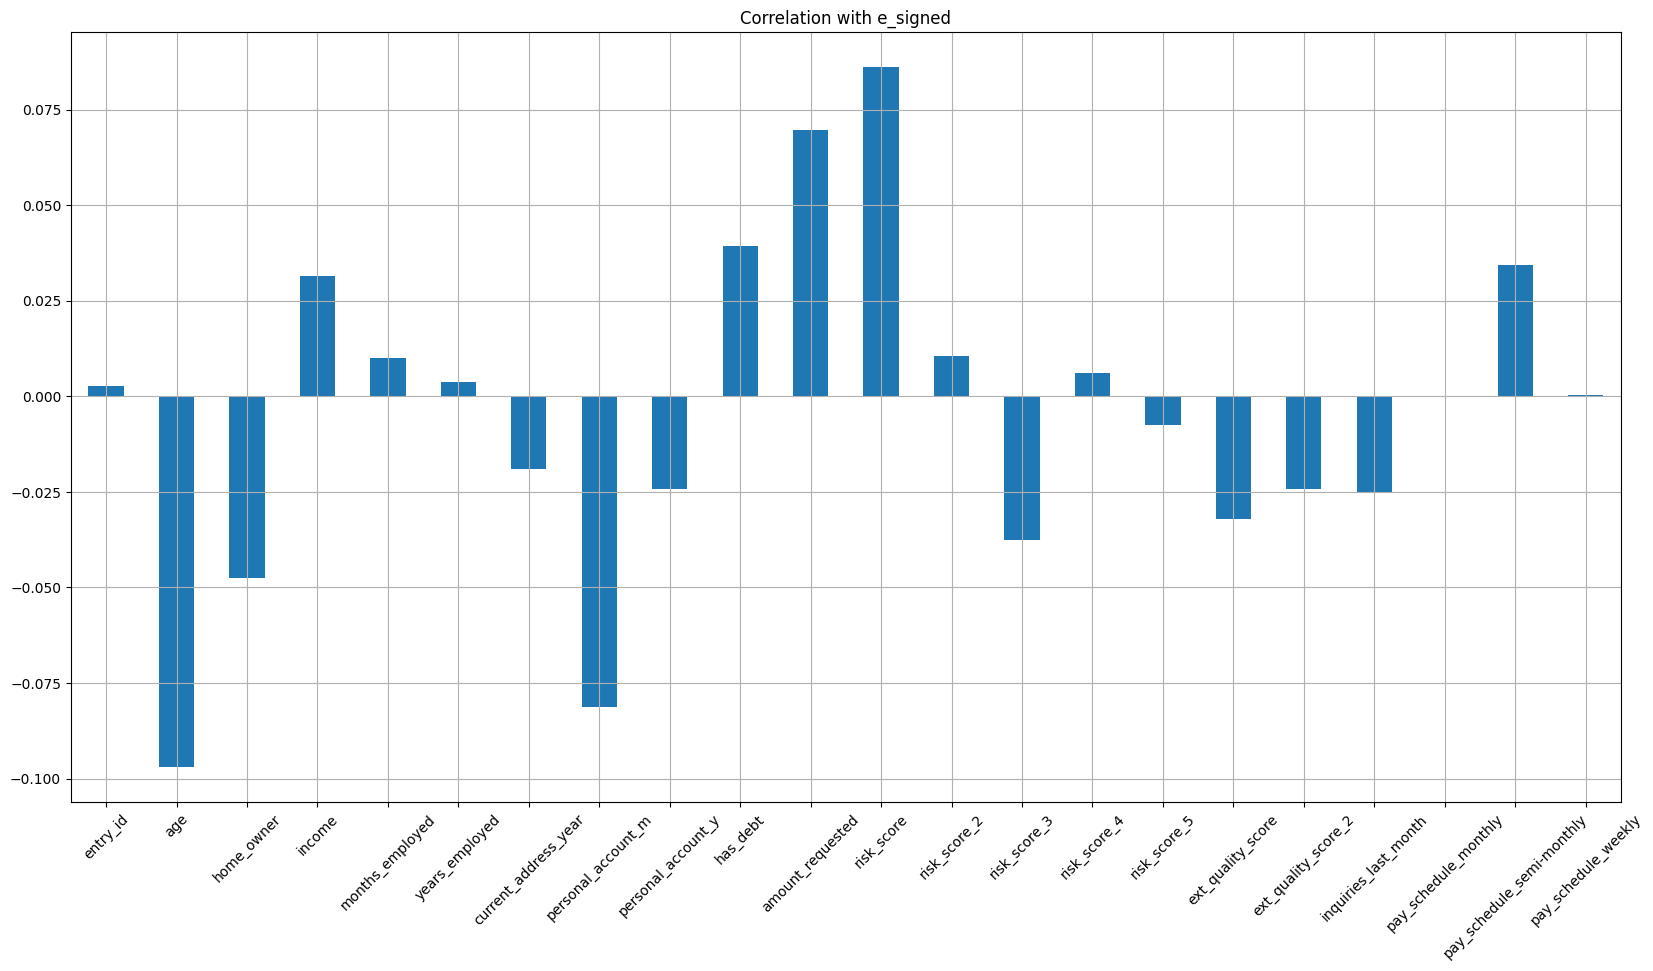

In [23]:
dataset_2.head()
correlations = dataset_2.corrwith(dataset['e_signed'])

# Create a bar plot to visualize correlations
plt.figure(figsize=(20, 10))
correlations.plot(kind='bar', title="Correlation with e_signed", rot=45, grid=True)
plt.show()

In [24]:
corr = dataset.corr()

In [25]:
corr

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
entry_id,1.000000,0.004333,0.002528,-0.009034,0.015546,-0.000950,-0.001701,-0.000515,-0.007721,0.007476,...,-0.005550,0.006963,0.004949,0.006025,0.006392,-0.003492,0.002735,-0.017324,-0.013031,-0.003348
age,0.004333,1.000000,0.142046,0.174062,-0.103635,0.182590,0.146554,-0.013609,0.041332,-0.043808,...,0.111258,0.069191,0.093710,0.032265,0.040019,0.041224,-0.096998,0.141529,0.026439,-0.070750
home_owner,0.002528,0.142046,1.000000,0.147487,0.018008,0.027367,0.179291,0.013782,-0.047105,-0.076206,...,0.049708,-0.137293,-0.080470,0.010080,0.005507,0.011215,-0.047409,0.043587,0.004283,-0.025521
income,-0.009034,0.174062,0.147487,1.000000,-0.049157,0.102139,0.046982,0.009052,-0.002002,-0.011199,...,0.058665,-0.001254,0.025179,-0.008429,-0.003323,0.051622,0.031377,0.034177,0.065759,-0.025361
months_employed,0.015546,-0.103635,0.018008,-0.049157,1.000000,-0.189805,-0.056609,0.211605,-0.019645,-0.000546,...,-0.024297,-0.014512,-0.019406,-0.009041,-0.004461,-0.026710,0.010128,-0.020243,-0.016804,0.039627
years_employed,-0.000950,0.182590,0.027367,0.102139,-0.189805,1.000000,0.343905,-0.052543,0.184879,0.005293,...,0.074659,-0.029398,0.000234,0.014162,0.030353,0.011976,0.003748,0.042110,0.023060,-0.040134
current_address_year,-0.001701,0.146554,0.179291,0.046982,-0.056609,0.343905,1.000000,0.082491,0.110258,0.017423,...,0.058936,-0.161052,-0.094545,0.003362,0.009093,0.013659,-0.018969,0.011867,0.017395,-0.013041
personal_account_m,-0.000515,-0.013609,0.013782,0.009052,0.211605,-0.052543,0.082491,1.000000,-0.140649,0.246832,...,0.029162,-0.060695,-0.033960,-0.016151,-0.009181,-0.028225,-0.081195,-0.024374,-0.011594,0.004802
personal_account_y,-0.007721,0.041332,-0.047105,-0.002002,-0.019645,0.184879,0.110258,-0.140649,1.000000,-0.030701,...,0.079175,0.012877,0.042121,0.039808,0.029372,0.003923,-0.024160,0.010126,0.003196,0.000044
has_debt,0.007476,-0.043808,-0.076206,-0.011199,-0.000546,0.005293,0.017423,0.246832,-0.030701,1.000000,...,0.001108,0.002074,0.002341,-0.021523,-0.009055,-0.001007,0.039192,-0.088523,-0.001747,0.022986


<Axes: >

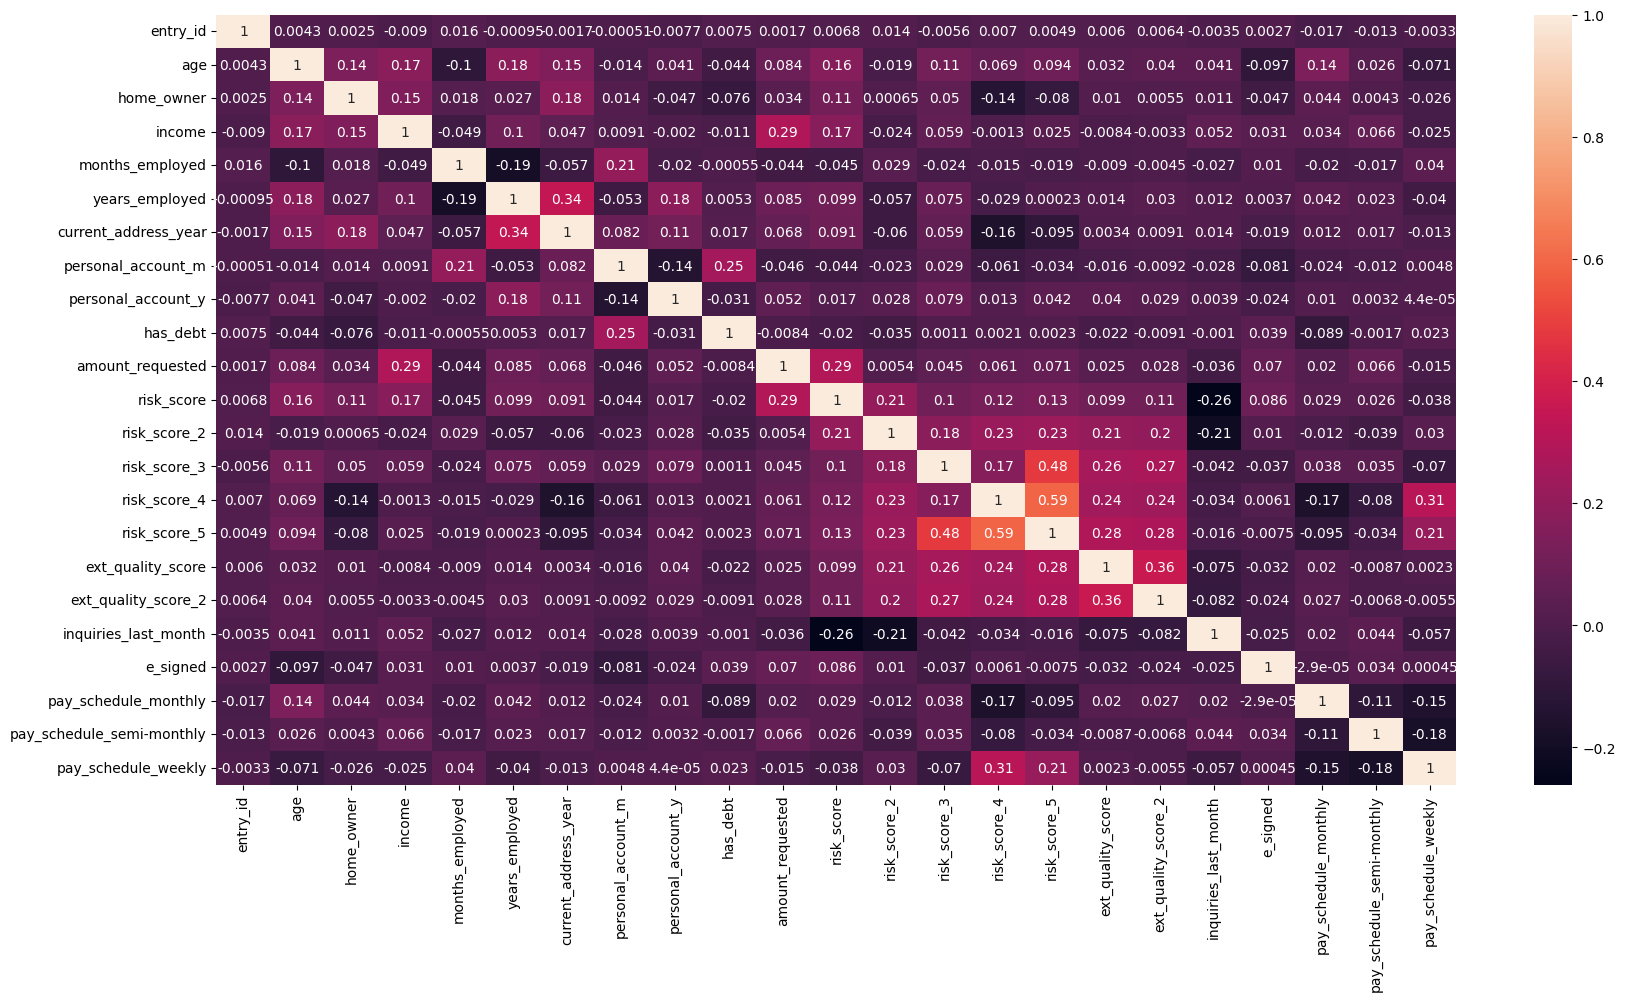

In [26]:
## Heat Map
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [27]:
corr_2 = corr[corr > 0.2]

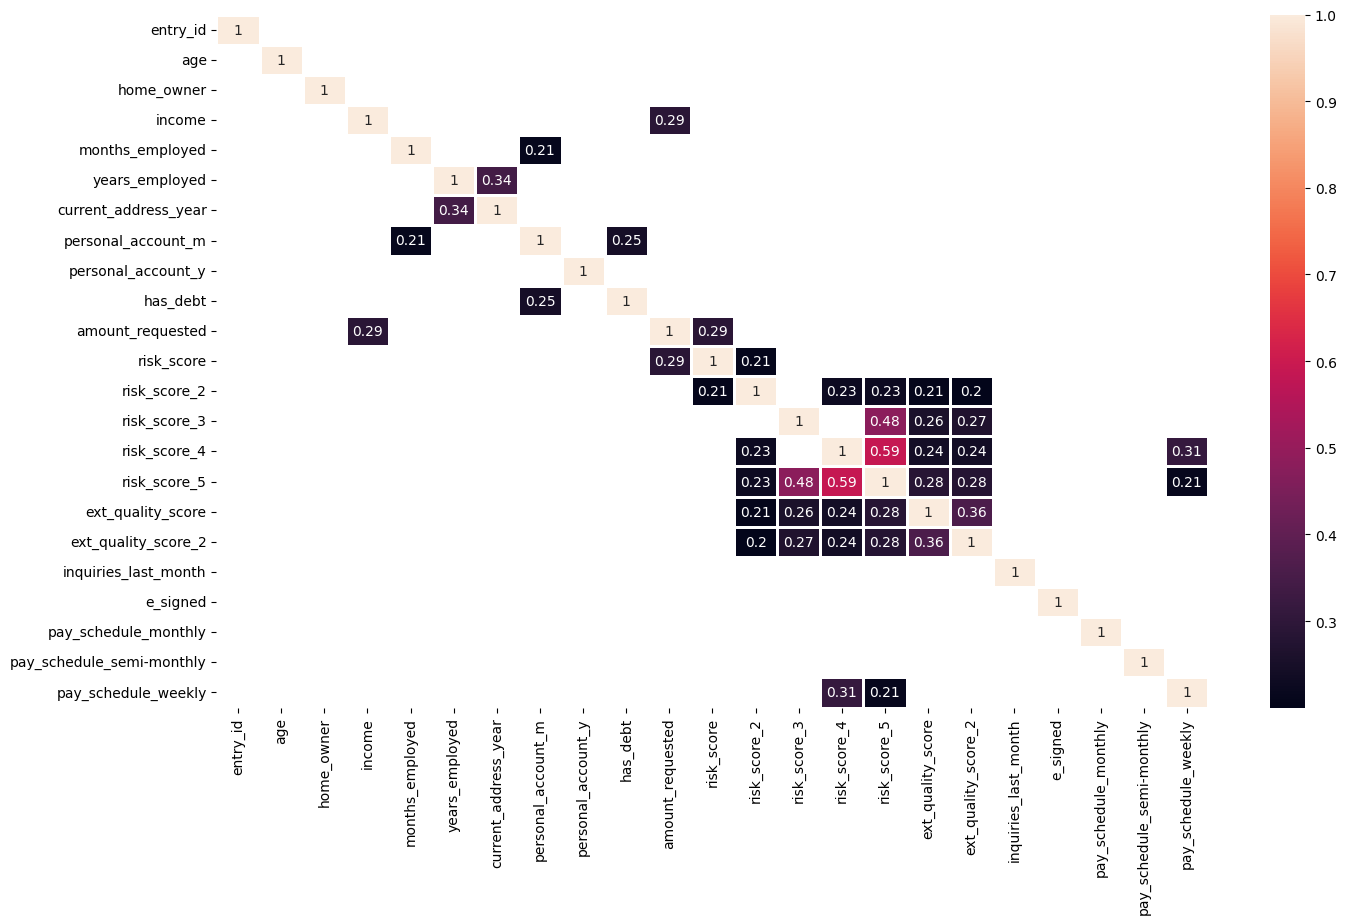

In [28]:
# correlation heatmap
plt.figure(figsize=(16,9))
ax = sns.heatmap(corr_2, annot=True, linewidths=2)

## Restructure the data

In [29]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [30]:
dataset["months_employed"] += dataset["years_employed"]*12

In [31]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,36,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,72,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,72,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,60,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [32]:
dataset =dataset.drop(columns="years_employed")

In [33]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,36,3,6,2,1,550,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,72,3,2,7,1,600,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,7,1,1,450,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,72,1,2,7,1,700,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,60,2,2,8,1,1100,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [34]:
dataset["personal_account_m"] += dataset["personal_account_y"]*12

In [35]:
dataset.head()


,entry_id,age,home_owner,income,months_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,36,3,30,2,1,550,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,72,3,86,7,1,600,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,19,1,1,450,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,72,1,86,7,1,700,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,60,2,98,8,1,1100,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [36]:
dataset =dataset.drop(columns="personal_account_y")

In [37]:
dataset.head()


,entry_id,age,home_owner,income,months_employed,current_address_year,personal_account_m,has_debt,amount_requested,risk_score,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,36,3,30,1,550,36200,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,72,3,86,1,600,30150,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,19,1,450,34550,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,72,1,86,1,700,42150,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,60,2,98,1,1100,53850,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


## Correlattion  Matrix and Heat Map

In [38]:
dataset_2 = dataset.drop(columns="e_signed")

In [39]:
dataset_2.head()


,entry_id,age,home_owner,income,months_employed,current_address_year,personal_account_m,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,36,3,30,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,0,0,0
1,3560428,61,0,3180,72,3,86,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,1
2,6934997,23,0,1540,6,0,19,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,1
3,5682812,40,0,5230,72,1,86,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,0,0,0
4,5335819,33,0,3590,60,2,98,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,1,0


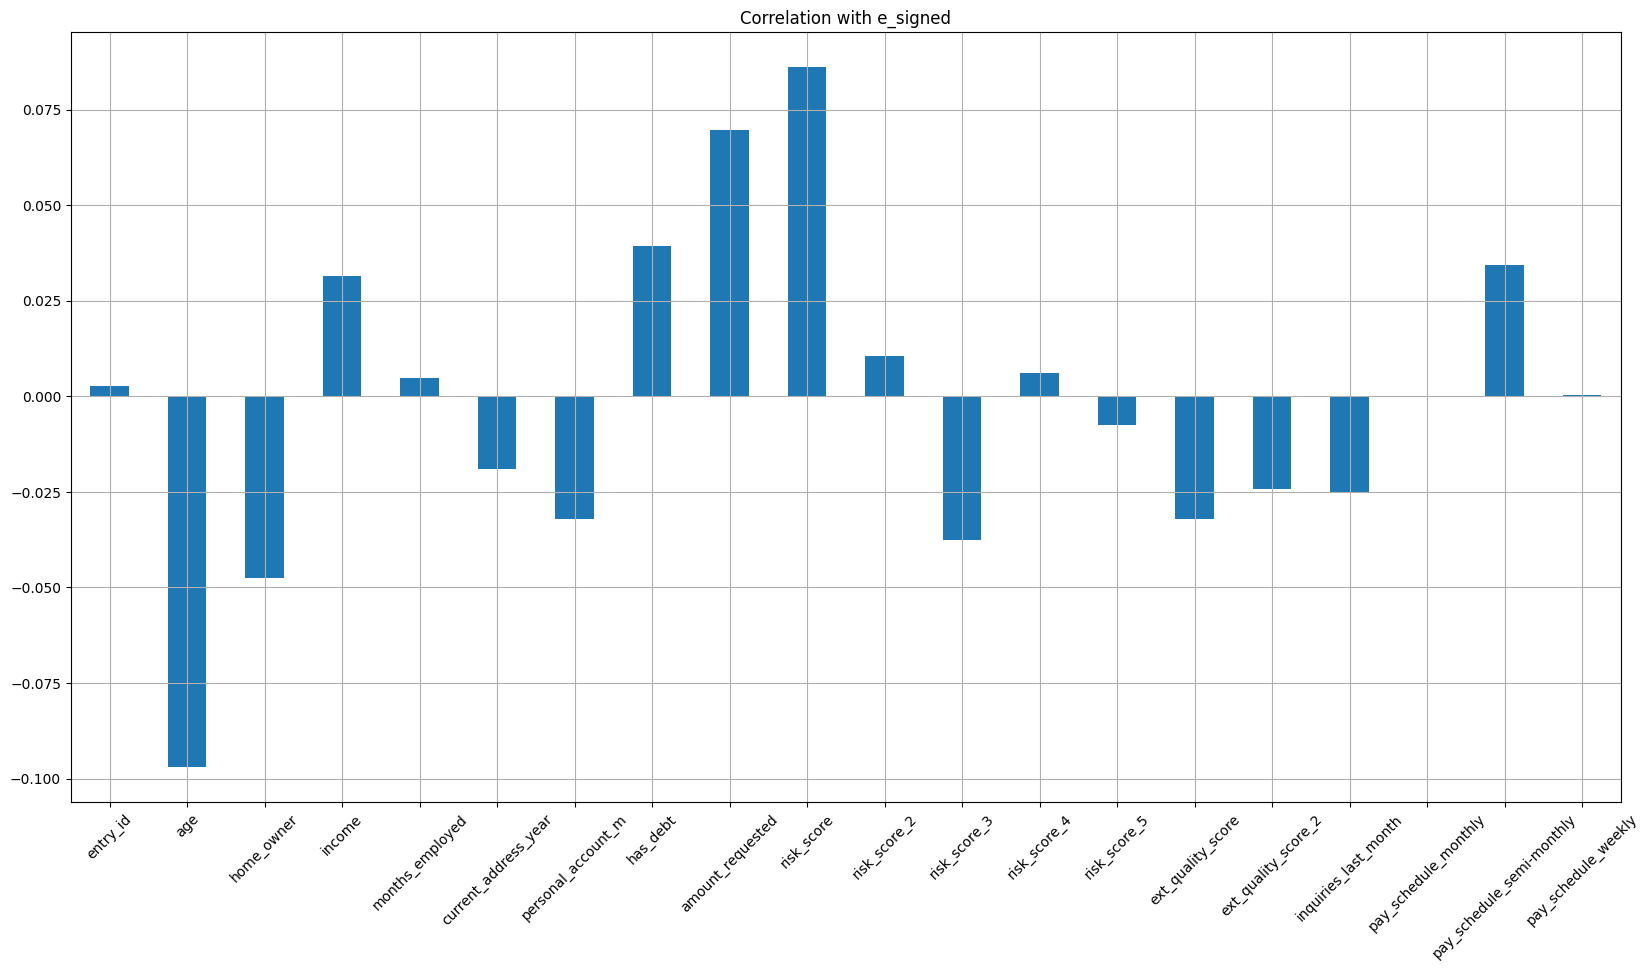

In [40]:
correlations = dataset_2.corrwith(dataset['e_signed'])

# Create a bar plot to visualize correlations
plt.figure(figsize=(20, 10))
correlations.plot(kind='bar', title="Correlation with e_signed", rot=45, grid=True)
plt.show()

In [41]:
## correlation matrix
cor = dataset.corr()

In [42]:
cor

,entry_id,age,home_owner,income,months_employed,current_address_year,personal_account_m,has_debt,amount_requested,risk_score,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
entry_id,1.000000,0.004333,0.002528,-0.009034,0.000432,-0.001701,-0.007839,0.007476,0.001720,0.006780,...,-0.005550,0.006963,0.004949,0.006025,0.006392,-0.003492,0.002735,-0.017324,-0.013031,-0.003348
age,0.004333,1.000000,0.142046,0.174062,0.175693,0.146554,0.040405,-0.043808,0.084132,0.162868,...,0.111258,0.069191,0.093710,0.032265,0.040019,0.041224,-0.096998,0.141529,0.026439,-0.070750
home_owner,0.002528,0.142046,1.000000,0.147487,0.029342,0.179291,-0.046213,-0.076206,0.033996,0.113608,...,0.049708,-0.137293,-0.080470,0.010080,0.005507,0.011215,-0.047409,0.043587,0.004283,-0.025521
income,-0.009034,0.174062,0.147487,1.000000,0.099071,0.046982,-0.001157,-0.011199,0.289099,0.168375,...,0.058665,-0.001254,0.025179,-0.008429,-0.003323,0.051622,0.031377,0.034177,0.065759,-0.025361
months_employed,0.000432,0.175693,0.029342,0.099071,1.000000,0.343346,0.183942,0.005314,0.081987,0.096245,...,0.073461,-0.031087,-0.001504,0.013537,0.030351,0.009738,0.004705,0.040848,0.021856,-0.037106
current_address_year,-0.001701,0.146554,0.179291,0.046982,0.343346,1.000000,0.119105,0.017423,0.067893,0.090535,...,0.058936,-0.161052,-0.094545,0.003362,0.009093,0.013659,-0.018969,0.011867,0.017395,-0.013041
personal_account_m,-0.007839,0.040405,-0.046213,-0.001157,0.183942,0.119105,1.000000,-0.007454,0.047924,0.013017,...,0.082662,0.007208,0.039261,0.038625,0.028760,0.001268,-0.032114,0.007894,0.002120,0.000501
has_debt,0.007476,-0.043808,-0.076206,-0.011199,0.005314,0.017423,-0.007454,1.000000,-0.008445,-0.020332,...,0.001108,0.002074,0.002341,-0.021523,-0.009055,-0.001007,0.039192,-0.088523,-0.001747,0.022986
amount_requested,0.001720,0.084132,0.033996,0.289099,0.081987,0.067893,0.047924,-0.008445,1.000000,0.290716,...,0.045465,0.061459,0.071470,0.025167,0.028052,-0.036197,0.069572,0.019609,0.066022,-0.015255
risk_score,0.006780,0.162868,0.113608,0.168375,0.096245,0.090535,0.013017,-0.020332,0.290716,1.000000,...,0.104861,0.120234,0.130464,0.098649,0.108170,-0.261076,0.086098,0.028606,0.026159,-0.038039


<Axes: >

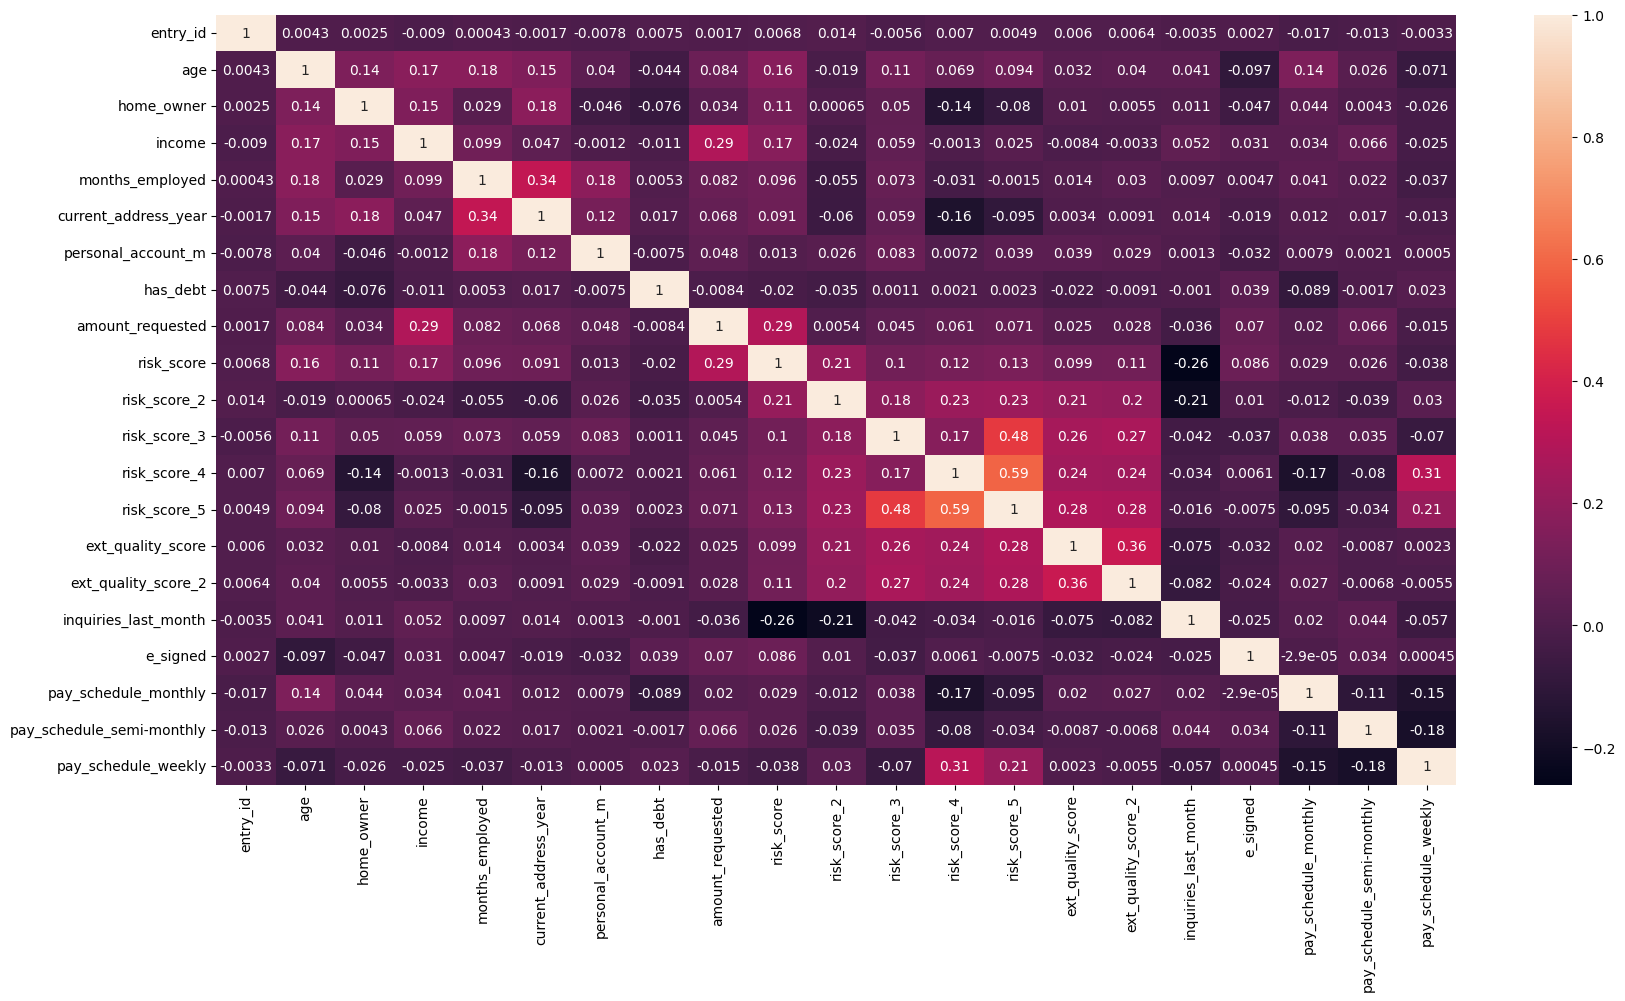

In [43]:
## Heat Map
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

## Splitting the dataset into test and training

In [44]:
# matrix of features
x = dataset.drop(columns=['entry_id', 'e_signed'])

In [45]:
x.shape

(17908, 19)

In [46]:
# target/dependent variable
y = dataset['e_signed']

In [47]:
y.shape

(17908,)

In [48]:
# split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [49]:
x_train.shape

(14326, 19)

In [50]:
x_test.shape

(3582, 19)

In [51]:
y_train.shape

(14326,)

In [52]:
y_test.shape

(3582,)

## Feature  Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [54]:
x_train


array([[-0.00599126, -0.85634884, -0.24235846, ..., -0.30236006,
        -0.35607494,  1.97682704],
       [-0.50989022, -0.85634884, -0.05259224, ...,  3.30731512,
        -0.35607494, -0.50586115],
       [-0.7618397 ,  1.16774842, -0.41214928, ..., -0.30236006,
        -0.35607494, -0.50586115],
       ...,
       [ 0.16197506, -0.85634884, -0.46541699, ..., -0.30236006,
        -0.35607494, -0.50586115],
       [ 1.08578982, -0.85634884, -0.69846323, ..., -0.30236006,
         2.80839755, -0.50586115],
       [-0.7618397 , -0.85634884, -0.36554004, ..., -0.30236006,
        -0.35607494, -0.50586115]])

In [55]:
x_test

array([[-1.01378918, -0.85634884, -0.24235846, ..., -0.30236006,
         2.80839755, -0.50586115],
       [-1.01378918, -0.85634884, -0.33557695, ..., -0.30236006,
        -0.35607494, -0.50586115],
       [ 0.24595822, -0.85634884, -0.59858627, ..., -0.30236006,
         2.80839755, -0.50586115],
       ...,
       [-0.08997442, -0.85634884, -0.41214928, ..., -0.30236006,
        -0.35607494, -0.50586115],
       [-0.25794074, -0.85634884, -0.25567539, ..., -0.30236006,
        -0.35607494, -0.50586115],
       [-0.08997442, -0.85634884, -0.72176785, ..., -0.30236006,
        -0.35607494,  1.97682704]])

# Part 2 : Building the model

## 1) Logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [57]:
y_pred = classifier_lr.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [59]:
accuracy_score( y_test,y_pred)

0.5628140703517588

In [60]:
confusion_matrix(y_test,y_pred)

array([[ 654, 1000],
       [ 566, 1362]])

## 2) SVM

In [61]:
from sklearn.svm import SVC
classifier_svc = SVC(random_state=0)
classifier_svc.fit(x_train,y_train)

SVC(random_state=0)

In [62]:
y_pred = classifier_svc.predict(x_test)

In [63]:
accuracy_score( y_test,y_pred)

0.5946398659966499

In [64]:
confusion_matrix(y_test,y_pred)

array([[ 797,  857],
       [ 595, 1333]])

## 3)Random Forest Model

In [65]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [66]:
y_pred = classifier_rf.predict(x_test)

In [67]:
accuracy_score( y_test,y_pred)

0.6267448352875489

In [68]:
confusion_matrix(y_test,y_pred)

array([[ 947,  707],
       [ 630, 1298]])

## 3) XGBoost Classifier

In [69]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [70]:
y_pred = classifier_xgb.predict(x_test)


In [71]:
accuracy_score( y_test,y_pred)


0.6303740926856505

In [72]:
confusion_matrix(y_test,y_pred)


array([[ 932,  722],
       [ 602, 1326]])

# Part3 : Applying Randomized search to find the best parameters

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
parameter = {
    "learning_rate":[0.05,.1,.15,.2,.25,.3],
    "max_depth":[2,3,4,5,6,7,8,10,12,15],
    "in_child_weight":[1,3,5,7],
    "gamma":[0.1,.2,.3,.4],
    "colsample_bytree":[.3,.4,.5,.7],
    "n_estimators":[100,200,300,400,500],
    "subsample":[0.5,0.7,1.0]
}

In [75]:
parameter

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 12, 15],
 'in_child_weight': [1, 3, 5, 7],
 'gamma': [0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
 'n_estimators': [100, 200, 300, 400, 500],
 'subsample': [0.5, 0.7, 1.0]}

In [76]:
randomized_search = RandomizedSearchCV(estimator=classifier_xgb,param_distributions=parameter,n_iter=5,
                                       n_jobs=-1,scoring="roc_auc",cv=5,verbose=3)

In [77]:
randomized_search.fit(x_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learn

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, in_child_weight=5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5;, score=0.678 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, in_child_weight=5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5;, score=0.666 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, in_child_weight=5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5;, score=0.666 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END colsample_bytree=0.4, gamma=0.2, in_child_weight=5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5;, score=0.672 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, in_child_weight=5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5;, score=0.680 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END colsample_bytree=0.5, gamma=0.1, in_child_weight=7, learning_rate=0.25, max_depth=4, n_estimators=500, subsample=0.7;, score=0.677 total time=   1.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, in_child_weight=7, learning_rate=0.25, max_depth=4, n_estimators=500, subsample=0.7;, score=0.672 total time=   1.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, in_child_weight=7, learning_rate=0.25, max_depth=4, n_estimators=500, subsample=0.7;, score=0.666 total time=   1.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, in_child_weight=7, learning_rate=0.25, max_depth=4, n_estimators=500, subsample=0.7;, score=0.676 total time=   1.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, in_child_weight=7, learning_rate=0.25, max_depth=4, n_estimators=500, subsample=0.7;, score=0.670 total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learn

[CV 1/5] END colsample_bytree=0.5, gamma=0.3, in_child_weight=3, learning_rate=0.25, max_depth=4, n_estimators=500, subsample=0.7;, score=0.681 total time=   1.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, in_child_weight=3, learning_rate=0.25, max_depth=4, n_estimators=500, subsample=0.7;, score=0.667 total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END colsample_bytree=0.5, gamma=0.3, in_child_weight=3, learning_rate=0.25, max_depth=4, n_estimators=500, subsample=0.7;, score=0.664 total time=   1.4s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, in_child_weight=3, learning_rate=0.25, max_depth=5, n_estimators=200, subsample=0.5;, score=0.663 total time=   0.8s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, in_child_weight=3, learning_rate=0.25, max_depth=5, n_estimators=200, subsample=0.5;, score=0.649 total time=   0.8s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, in_child_weight=3, learning_rate=0.25, max_depth=5, n_estimators=200, subsample=0.5;, score=0.666 total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learn

[CV 4/5] END colsample_bytree=0.7, gamma=0.4, in_child_weight=3, learning_rate=0.25, max_depth=5, n_estimators=200, subsample=0.5;, score=0.673 total time=   0.9s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, in_child_weight=3, learning_rate=0.25, max_depth=4, n_estimators=500, subsample=0.7;, score=0.686 total time=   1.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, in_child_weight=3, learning_rate=0.25, max_depth=4, n_estimators=500, subsample=0.7;, score=0.685 total time=   1.4s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, in_child_weight=3, learning_rate=0.25, max_depth=5, n_estimators=200, subsample=0.5;, score=0.674 total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END colsample_bytree=0.4, gamma=0.2, in_child_weight=7, learning_rate=0.25, max_depth=10, n_estimators=500, subsample=1.0;, score=0.672 total time=   1.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, in_child_weight=7, learning_rate=0.25, max_depth=10, n_estimators=500, subsample=1.0;, score=0.676 total time=   1.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, in_child_weight=7, learning_rate=0.25, max_depth=10, n_estimators=500, subsample=1.0;, score=0.680 total time=   1.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, in_child_weight=7, learning_rate=0.25, max_depth=10, n_estimators=500, subsample=1.0;, score=0.662 total time=   1.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, in_child_weight=7, learning_rate=0.25, max_depth=10, n_estimators=500, subsample=1.0;, score=0.674 total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:12:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=0, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.1, 0.2, 0.3, 0.4],
                                        'in_child_weight': [1, 3, 5, 7],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 10,
                                                      12, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   scoring='roc_auc', verbose=3)

In [78]:
randomized_search.best_estimator_



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              in_child_weight=3, interaction_constraints=None,
              learning_rate=0.25, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [79]:
randomized_search.best_score_

0.6764901904845353

In [80]:
randomized_search.best_params_


{'subsample': 0.7,
 'n_estimators': 500,
 'max_depth': 4,
 'learning_rate': 0.25,
 'in_child_weight': 3,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

# Part 4 :Final Model (XGBoost CLassifier)

In [81]:
from xgboost import XGBClassifier
classifier = XGBClassifier(subsample =0.5,n_estimators =100,max_depth =12,
                           learning_rate =0.05,in_child_weight = 7,gamma=0.2,colsample_bytree=0.7)
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              in_child_weight=7, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [82]:
y_pred = classifier.predict(x_test)

In [83]:
accuracy_score(y_test, y_pred)

0.6342825237297599

In [84]:
confusion_matrix(y_test,y_pred)

array([[ 935,  719],
       [ 591, 1337]])